In [1]:
import pandas as pd
import numpy as np
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [8]:
path = '../data/generated/df_newimages_bands_downside.pkl.z'

In [9]:
df = jb.load(path)
df.head()

,x,y,z,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7
0,233,1130,3.195862,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,1.162614,1.094573,0.419775,0.302256,-0.152982,23.382784
1,233,1131,3.273030,0.1199,0.0880,0.0668,0.0457,0.0490,0.0316,0.0283,0.0237,1.171434,1.099318,0.419775,0.316380,-0.153713,23.382784
2,233,1132,3.299687,0.1199,0.0879,0.0666,0.0461,0.0488,0.0324,0.0281,0.0238,1.168473,1.096035,0.421458,0.311940,-0.154246,23.158824
3,233,1133,3.268182,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,1.175411,1.111754,0.421458,0.322339,-0.172881,23.158824
4,233,1134,3.278125,0.1196,0.0884,0.0677,0.0454,0.0489,0.0323,0.0285,0.0238,1.174645,1.104724,0.419585,0.321375,-0.161235,23.607309


In [10]:
features = df[['x', 'y', 'z', 'b1', 'b2', 'b3', 'b4', 'b5','b6', 'cspmb7']]

In [11]:
th = 200
var = 'y'
#X_train = features[features[var] >= th].drop(['x', 'y', 'z'], axis=1)
X_train = features[features[var] >= th][['b5', 'b1']]
y_train = features[features[var] >= th].z

#X_val = features[features[var] < th].drop(['x', 'y', 'z'], axis=1)
X_val = features[features[var] < th][['b5', 'b1']]
y_val = features[features[var] < th].z

X_train.shape, X_val.shape

((16084, 2), (3203, 2))

In [12]:
rf = RandomForestRegressor(n_estimators=500)

lgbm = LGBMRegressor(n_estimators=20, max_depth=1, min_samples_leaf=4)

In [13]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [14]:
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: min_samples_leaf


LGBMRegressor(max_depth=1, min_samples_leaf=4, n_estimators=20)

In [15]:
p = rf.predict(X_val)

In [16]:
p_lgbm = lgbm.predict(X_val)

In [17]:
print('rf:', r2_score(y_val, p))
print('lgbm:', r2_score(y_val, p_lgbm))

rf: -0.1974924864287939
lgbm: -0.1293009033409125


In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
th = 200
var = 'y'
#X_train = features[features[var] >= th].drop(['x', 'y', 'z'], axis=1)
X_train = df[features[var] >= th][['ndwi53']]
y_train = df[features[var] >= th].z

#X_val = features[features[var] < th].drop(['x', 'y', 'z'], axis=1)
X_val = df[features[var] < th][['ndwi53']]
y_val = df[features[var] < th].z

X_train.shape, X_val.shape

((16084, 1), (3203, 1))

In [21]:
import matplotlib.pyplot as plt

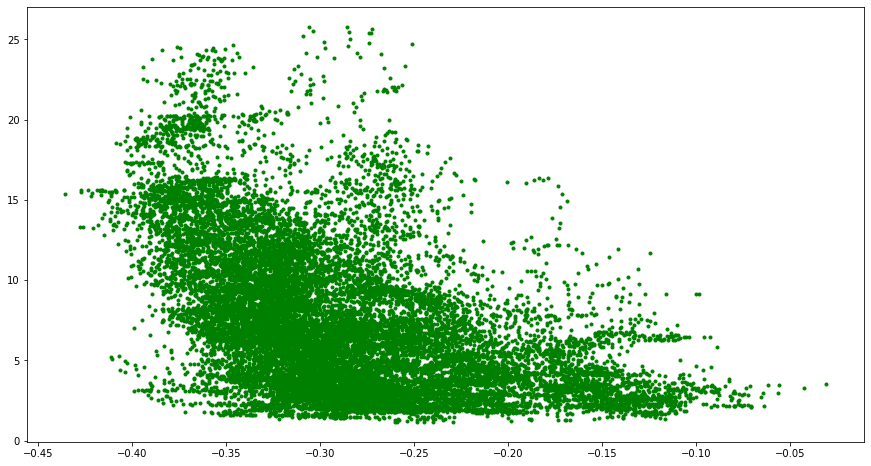

In [22]:
plt.figure(figsize=(15,8))
plt.plot(df['ndwi53'],df['z'], 'g.')

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
p = lr.predict(X_val)

In [26]:
r2_score(y_val, p)

0.17504245647129468

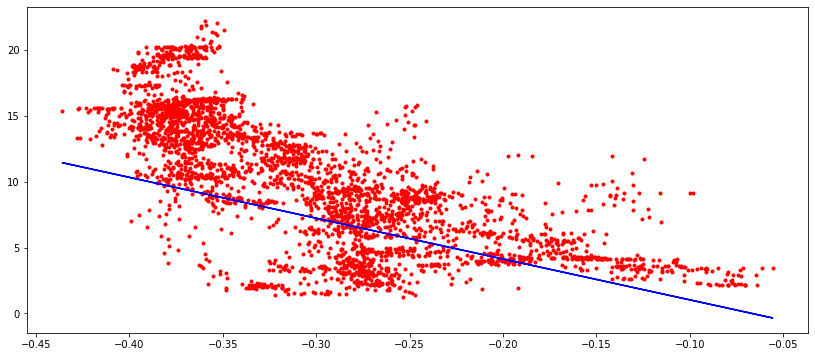

In [27]:
plt.figure(figsize=(14, 6))
plt.plot(X_val, y_val, 'r.', X_val, p, 'b-')

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [49]:
p = pol_reg.predict(poly_reg.transform(X_val))

In [50]:
r2_score(y_val, p)

0.4203149574620557

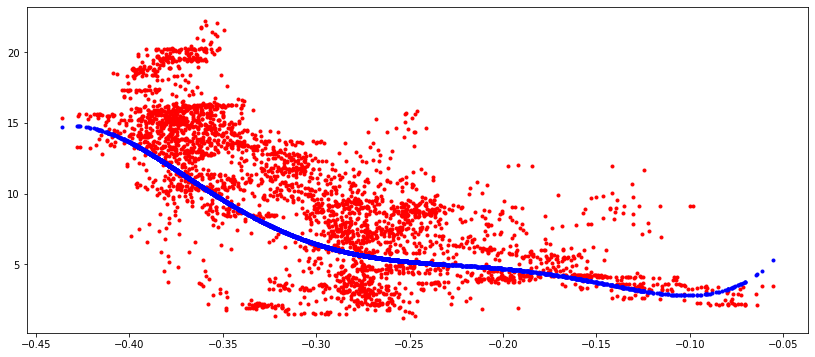

In [51]:
plt.figure(figsize=(14, 6))
plt.plot(X_val, y_val, 'r.', X_val, p, 'b.')

# CBR With polynomial regression

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(df.drop('z', axis=1))
pd.Series(kmeans.labels_).value_counts()


3    5773
0    4785
2    4370
1    4359
dtype: int64

In [53]:
df_features = df.copy()

In [54]:
df_features['cluster'] = kmeans.labels_
df_features.head(3)

,x,y,z,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7,cluster
0,233,1130,3.195862,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,1.162614,1.094573,0.419775,0.302256,-0.152982,23.382784,3
1,233,1131,3.273030,0.1199,0.0880,0.0668,0.0457,0.0490,0.0316,0.0283,0.0237,1.171434,1.099318,0.419775,0.316380,-0.153713,23.382784,3
2,233,1132,3.299687,0.1199,0.0879,0.0666,0.0461,0.0488,0.0324,0.0281,0.0238,1.168473,1.096035,0.421458,0.311940,-0.154246,23.158824,3


In [55]:
df_dist = pd.DataFrame(kmeans.transform(df_features.drop(['cluster', 'z'],axis=1)))
df_dist.columns = ['norm_dist_to_0','norm_dist_to_1', 'norm_dist_to_2', 'norm_dist_to_3']
df_dist['norm_dist_to_0'] = 1/df_dist['norm_dist_to_0']
df_dist['norm_dist_to_1'] = 1/df_dist['norm_dist_to_1']
df_dist['norm_dist_to_2'] = 1/df_dist['norm_dist_to_2']
df_dist['norm_dist_to_3'] = 1/df_dist['norm_dist_to_3']
df_dist['sum'] = df_dist.sum(axis=1)
df_dist['norm_dist_to_0'] = df_dist['norm_dist_to_0']/df_dist['sum']
df_dist['norm_dist_to_1'] = df_dist['norm_dist_to_1']/df_dist['sum']
df_dist['norm_dist_to_2'] = df_dist['norm_dist_to_2']/df_dist['sum']
df_dist['norm_dist_to_3'] = df_dist['norm_dist_to_3']/df_dist['sum']
df_dist.drop(['sum'],axis=1,inplace=True)
df_dist.head()


,norm_dist_to_0,norm_dist_to_1,norm_dist_to_2,norm_dist_to_3
0,0.195872,0.125612,0.284162,0.394354
1,0.195874,0.125623,0.283984,0.394520
2,0.195876,0.125634,0.283806,0.394684
3,0.195879,0.125645,0.283629,0.394848
4,0.195882,0.125656,0.283451,0.395011


In [56]:
df_features = pd.concat([df_features, df_dist], axis=1)
df_features.head(2)

,x,y,z,b1,b2,b3,b4,b5,b6,b7,...,b3b4,ndwi15,ndwi24,ndwi53,cspmb7,cluster,norm_dist_to_0,norm_dist_to_1,norm_dist_to_2,norm_dist_to_3
0,233,1130,3.195862,0.1199,0.0866,0.0667,0.0464,0.049,0.0316,0.0283,...,1.094573,0.419775,0.302256,-0.152982,23.382784,3,0.195872,0.125612,0.284162,0.394354
1,233,1131,3.273030,0.1199,0.0880,0.0668,0.0457,0.049,0.0316,0.0283,...,1.099318,0.419775,0.316380,-0.153713,23.382784,3,0.195874,0.125623,0.283984,0.394520


In [57]:
th = 200
var = 'y'
X_train = df_features[df_features[var] >= th].drop(['x', 'y', 'z'], axis=1)
#X_train = df[features[var] >= th][['ndwi53']]
y_train = df_features[df_features[var] >= th].z

X_val = df_features[df_features[var] < th].drop(['x', 'y', 'z'], axis=1)
#X_val = df[features[var] < th][['ndwi53']]
y_val = df_features[df_features[var] < th].z

X_train.shape, X_val.shape

((16084, 19), (3203, 19))

In [58]:
X_train

,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7,cluster,norm_dist_to_0,norm_dist_to_1,norm_dist_to_2,norm_dist_to_3
0,0.1199,0.0866,0.0667,0.0464,0.0490,0.0316,0.0283,0.0238,1.162614,1.094573,0.419775,0.302256,-0.152982,23.382784,3,0.195872,0.125612,0.284162,0.394354
1,0.1199,0.0880,0.0668,0.0457,0.0490,0.0316,0.0283,0.0237,1.171434,1.099318,0.419775,0.316380,-0.153713,23.382784,3,0.195874,0.125623,0.283984,0.394520
2,0.1199,0.0879,0.0666,0.0461,0.0488,0.0324,0.0281,0.0238,1.168473,1.096035,0.421458,0.311940,-0.154246,23.158824,3,0.195876,0.125634,0.283806,0.394684
3,0.1199,0.0882,0.0692,0.0452,0.0488,0.0324,0.0281,0.0232,1.175411,1.111754,0.421458,0.322339,-0.172881,23.158824,3,0.195879,0.125645,0.283629,0.394848
4,0.1196,0.0884,0.0677,0.0454,0.0489,0.0323,0.0285,0.0238,1.174645,1.104724,0.419585,0.321375,-0.161235,23.607309,3,0.195882,0.125656,0.283451,0.395011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18636,0.1260,0.0988,0.0804,0.0501,0.0424,0.0273,0.0248,0.0218,1.173498,1.120846,0.496437,0.327065,-0.309446,19.547578,1,0.172069,0.633032,0.102979,0.091920
18641,0.1260,0.0998,0.0799,0.0490,0.0424,0.0273,0.0248,0.0220,1.182780,1.125637,0.496437,0.341398,-0.306623,19.547578,1,0.172386,0.632265,0.103207,0.092142
18642,0.1260,0.1012,0.0814,0.0498,0.0424,0.0273,0.0248,0.0213,1.181443,1.125731,0.496437,0.340397,-0.315024,19.547578,1,0.172677,0.631706,0.103334,0.092282
18643,0.1260,0.1007,0.0808,0.0511,0.0412,0.0268,0.0261,0.0207,1.172445,1.116476,0.507177,0.326746,-0.324590,20.950925,1,0.172968,0.631152,0.103459,0.092421


In [59]:
models = list()
for i in range(4):
    X_train_model = X_train[X_train['cluster'] == i]
    y_train_model = y_train[y_train.index.isin(X_train_model.index)]

    mdl = LinearRegression()
    mdl.fit(X_train_model[['ndwi53', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'ndwi24', 'b2b4', 'b3b4','cspmb7']], y_train_model)
    models.append(mdl)

In [60]:
predicts = list()
for i, model in enumerate(models):
    predict = model.predict(X_val[['ndwi53', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'ndwi24', 'b2b4', 'b3b4','cspmb7']])*X_val[f'norm_dist_to_{i}']
    predicts.append(predict)

In [61]:
df_predicts = pd.DataFrame(predicts).transpose()
df_predicts['predict'] = df_predicts.sum(axis=1)
df_predicts

,norm_dist_to_0,norm_dist_to_1,norm_dist_to_2,norm_dist_to_3,predict
731,0.837115,-0.001296,2.323471,0.867448,4.026738
732,0.793125,-0.020008,2.387450,0.856893,4.017460
736,0.999233,-0.131658,2.554483,0.889293,4.311352
740,1.090950,-0.006391,2.414763,0.862524,4.361846
744,1.081605,-0.399048,2.687208,0.942756,4.312521
...,...,...,...,...,...
19282,1.775340,3.391712,0.092848,0.813950,6.073850
19283,1.564482,3.135284,0.093926,0.712770,5.506461
19284,1.475445,3.222057,0.081249,0.696609,5.475361
19285,1.480364,3.435485,0.101569,0.683606,5.701024


In [62]:
y_val

731      1.721250
732      1.644828
736      1.771404
740      1.813208
744      1.905714
           ...   
19282    2.264000
19283    1.909714
19284    1.539000
19285    1.360263
19286    1.221429
Name: z, Length: 3203, dtype: float64

In [63]:
r2_score(y_val, df_predicts['predict'])

0.4086331888284974

In [192]:
from sklearn.preprocessing import StandardScaler

In [326]:
import shap
shap.initjs()

# Add standard scaler to variables (var = 1, mean=0)
## Train with top and test with bottom, threshold Y

In [565]:
th = 200
var = 'y'
X_train = df_features[df_features[var] >= th].drop(['z'], axis=1)
#X_train = df[features[var] >= th][['ndwi53']]
y_train = df_features[df_features[var] >= th].z

X_val = df_features[df_features[var] < th].drop(['z'], axis=1)
#X_val = df[features[var] < th][['ndwi53']]
y_val = df_features[df_features[var] < th].z

X_train.shape, X_val.shape

((16084, 21), (3203, 21))

In [566]:
scaler = StandardScaler()

In [577]:
#columns = ['ndwi53', 'ndwi24', 'cspmb7', 'b3b4', 'b2b4']
columns = ['b1','b2', 'b3', 'b5', 'b2b4', 'b3b4']

In [578]:
X_train_scaled = scaler.fit_transform(X_train[columns])
X_val_scaled = scaler.transform(X_val[columns])

In [579]:
X_train.columns

Index(['x', 'y', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b2b4',
       'b3b4', 'ndwi15', 'ndwi24', 'ndwi53', 'cspmb7', 'cluster',
       'norm_dist_to_0', 'norm_dist_to_1', 'norm_dist_to_2', 'norm_dist_to_3'],
      dtype='object')

In [587]:
rf = RandomForestRegressor(n_estimators=100, max_features='log2', max_depth=15, n_jobs=-1)

In [588]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=15, max_features='log2', n_jobs=-1)

In [589]:
p = rf.predict(X_val_scaled)
p

array([3.51630164, 3.48482488, 3.97443713, ..., 3.81144488, 5.19706484,
       8.66701086])

In [590]:
print('Train with top and test with bottom, threshold Y')
print('r2:', r2_score(y_val, p))
print('mse',  mean_absolute_error(y_val, p))

Train with top and test with bottom, threshold Y
r2: 0.2808474136751419
mse 3.2219462651743327


In [591]:
shap_train_df = pd.DataFrame(X_train_scaled)
shap_train_df.columns = columns

In [592]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(shap_train_df, approximate=True)

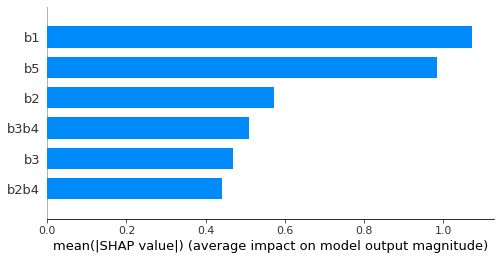

In [593]:
shap.summary_plot(shap_values, shap_train_df, plot_type="bar")

## Train with Bottom and test with top, threshold Y

In [228]:

th = 1050
var = 'y'
X_train = df_features[df_features[var] <= th].drop(['z'], axis=1)
#X_train = df[features[var] >= th][['ndwi53']]
y_train = df_features[df_features[var] <= th].z

X_val = df_features[df_features[var] > th].drop(['z'], axis=1)
#X_val = df[features[var] < th][['ndwi53']]
y_val = df_features[df_features[var] > th].z

X_train.shape, X_val.shape

((16146, 21), (3141, 21))

In [229]:
scaler = StandardScaler()

In [230]:
#columns = ['ndwi53', 'ndwi24', 'cspmb7', 'b3b4', 'b2b4']
columns = ['b2', 'b3', 'b5', 'b2b4', 'b3b4']

In [231]:
X_train_scaled = scaler.fit_transform(X_train[columns])
X_val_scaled = scaler.transform(X_val[columns])

In [232]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5, max_features='log2', n_jobs=-1)

In [233]:
p = rf.predict(X_val_scaled)
p

array([5.58519668, 4.90153299, 4.94186508, ..., 6.55946493, 7.67196804,
       6.41406254])

In [234]:
print('Train with top and test with bottom, threshold Y')
print('r2:', r2_score(y_val, p))
print('mse',  mean_absolute_error(y_val, p))

Train with top and test with bottom, threshold Y
r2: 0.09157097269580194
mse 2.620424983928866
